## Questões

1. **A idade determinou suas chances de sobrevivência?**
2. **Qual o tamanho de uma família de sobreviventes?**
3. **Baseado nas classes, comparar e identificar as relações entre elas?**


## Análise dos Dados

### Descrição dos dados

- **survival:** Survival (0 = No; 1 = Yes)
- **pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **name:** Name
- **sex:** Sex
- **age:** Age
- **sibsp:** Number of Siblings/Spouses Aboard
- **parch:** Number of Parents/Children Aboard
- **ticket:** Ticket Number
- **fare:** Passenger Fare
- **cabin:** Cabin
- **embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
# Matlib inline
%matplotlib inline

# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lê o csv e cria o dataframe
titanic_data = pd.read_csv('titanic-data-6.csv')

In [8]:
# Print dos primeiros registros para identificação de dados
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Print dos ultimos registros para identificação dos dados
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Nota:** Alguns valores para Age são NaN, enquanto os valores de ticket e cabine são alfanuméricos e também valores ausentes com NaN. Com isso, não serão necessários dados do ticket ou da cabine.

### Limpeza dos dados

Desde a descrição dos dados e perguntas até a resposta, nota-se que algumas colunas não serão utilizadas na análise e por isso podem ser removidas. Isso ajudará no processamento do desempenho do conjunto de dados.
- PassengerId
- Name
- Ticket
- Cabin
- Fare
- Embarked

Passos utilizados para a limpeza:
1. Identifique e remova quaisquer entradas duplicadas
2. Remova as colunas desnecessárias
3. Corrigir problemas de formato e de dados

#### 1 - Identifique e remova quaisquer entradas duplicadas
Não existem colunas duplicadas, como pode-se observar abaixo:

In [24]:
# Identifique e remova quaisquer entradas duplicadas
titanic_duplicados = titanic_data.duplicated()
sum(titanic_duplicados)

0

#### 2 - Remova as colunas desnecessárias
Colunas do passo **limpeza de dados** removidas

In [25]:
# Cria um novo dataset sem as colunas
to_drop = [
        'PassengerId',
        'Name',
        'Ticket',
        'Cabin',
        'Fare',
        'Embarked'
]

def clean_data(to_drop):
    """
    Função clean_data.
    Argumentos:
        to_drop: lista das colunas que deseja remover.
    Retorna:
        Retorna uma nova dataset sem as colunas to_drop.
    """
    titanic_dados_limpos = titanic_data.drop(to_drop, axis=1)
    return titanic_dados_limpos

titanic_dados_limpos = clean_data(to_drop)
titanic_dados_limpos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


#### 3 - Corrigir problemas de formato e de dados

In [26]:
# Soma de valores faltantes
titanic_dados_limpos.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [27]:
# Review da coluna Age para verificar dados NaN
coluna_idade_faltante = pd.isnull(titanic_dados_limpos['Age'])
titanic_dados_limpos[coluna_idade_faltante].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [28]:
# Visualização dos tipos de dados
titanic_dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Pode-se observar que a coluna **Age** irá implicar nas perguntas, então, graficamente iremos tratar as idades nulas como 0.

## Exploração e Visualização dos Dados

In [29]:
# Descrição dos dados
titanic_dados_limpos.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


## Questão 1
A idade determinou suas chances de sobrevivência?

Total de nulos no sexo feminino
Total de nulos no sexo masculino
Total de sobreviventes: 290
Total de mortes: 424
Idade aproximada da media de sobreviventes: 28
Idade aproximada da media de mortes: 31


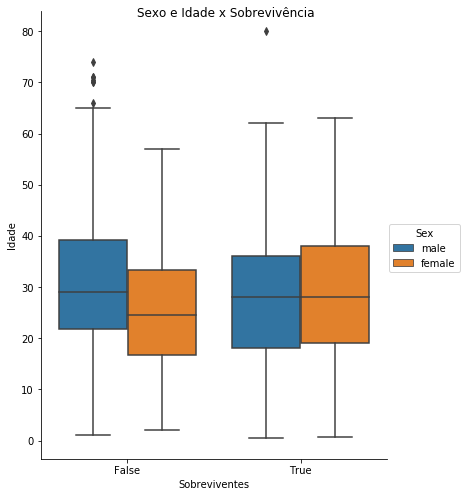

In [37]:
# Primeiro, identifica-se o número total de dados Age nulos
idade_feminino_vazio = titanic_dados_limpos[coluna_idade_faltante]['Sex'] == 'female'
idade_masculino_vazio = titanic_dados_limpos[coluna_idade_faltante]['Sex'] == 'male'

print ("Total de nulos no sexo feminino".format(idade_feminino_vazio.sum()))
print ("Total de nulos no sexo masculino".format(idade_masculino_vazio.sum()))

# Limpamos o dataset removendo os dados NaN
titanic_data_age_limpo = titanic_dados_limpos.dropna()

# Procuramos o total de sobreviventes e o total de mortes
num_sobreviventes = titanic_data_age_limpo[titanic_data_age_limpo['Survived'] == True]['Survived'].count()
num_mortes = titanic_data_age_limpo[titanic_data_age_limpo['Survived'] == False]['Survived'].count()

# Procuramos a média de sobreviventes e de mortes
idade_media_sobreviventes = titanic_data_age_limpo[titanic_data_age_limpo['Survived'] == True]['Age'].mean()
idade_media_mortes = titanic_data_age_limpo[titanic_data_age_limpo['Survived'] == False]['Age'].mean()

# Print dos resultados encontrado
print ("Total de sobreviventes: {}".format(num_sobreviventes))
print ("Total de mortes: {}".format(num_mortes))
print ("Idade aproximada da media de sobreviventes: {}".format(round(idade_media_sobreviventes)))
print ("Idade aproximada da media de mortes: {}".format(round(idade_media_mortes)))

# Gráfico - Idade dos passageiros com o sexo pela sobrevivência
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_limpo, kind="box", size=7, aspect=.8)

# Add um título
g.fig.suptitle('Sexo e Idade x Sobrevivência')

# Renomeia os labels
(
    g.set_axis_labels('Sobreviventes', 'Idade').set_xticklabels(["False", "True"])
)

Text(0.5,1,'Sexo e Idade x Sobrevivência (gráfico 2)')

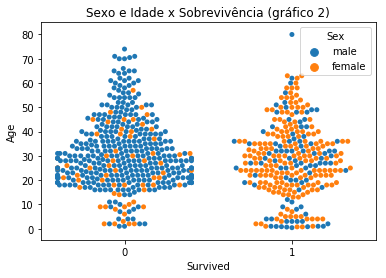

In [47]:
# Gráfico - Idade dos passageiros com o sexo pela sobrevivência em diferente aspecto
h = sns.swarmplot(x="Survived", y="Age", hue="Sex", data=titanic_data_age_limpo);

# Add título
(
    h.set_title('Sexo e Idade x Sobrevivência (gráfico 2)')
)

Baseado nos dados visíveis acima:
- Pode-se concluir que a **idade não é um fator deciviso para a taxa de sobrevivência**

## Questão 2
Qual o tamanho de uma família de sobreviventes?

In [12]:
# add Tamanho da Familia em nossa tabela
titanic_data_age_limpo['FamilySize'] = titanic_data_age_limpo['SibSp'] + titanic_data_age_limpo['Parch']
# Agrupamos pelo Tamanho ordenando pela coluna Survived
titanic_data_age_limpo[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

/home/allan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FamilySize,Survived
3,3,0.777778
2,2,0.569892
1,1,0.546763
6,6,0.333333
0,0,0.321782
4,4,0.272727
5,5,0.136364
7,7,0.000000


Após análise dos dados, observa-se que as famílias com **1 a 3 membros** tem uma taxa maior de sobrevivência que as famílias com **4 a 7 membros**

## Questão 3
Baseado nas classes, comparar e identificar as relações entre elas?

Text(0.5,0.98,'Classe x Sobrevivência')

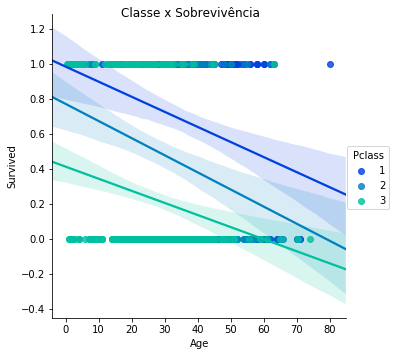

In [58]:
# Gráfico linar com idade x sobreviviu x classe
g = sns.lmplot('Age','Survived',hue='Pclass',data=titanic_data_age_limpo,palette='winter')

# Acessa a figura
fig = g.fig

# Add um título
fig.suptitle("Classe x Sobrevivência")


Como pode-se obversar no gŕafico acima, a classe **1** foi a que mais conteve sobreviventes enquanto a classe **3** a taxa de sobreviventes foi menor que 50%.

## Conclusão

Os resultados da análise indicam que classe e sexo, ou seja, ser uma mulher da classe econônimica superior (classe 1), dariam uma melhor taxa de sobrevivência. A idade parece não ser um fator decisivo. Mulheres e crianças, em todas as classes, tendem a ter uma taxa de sobrevivência mais alta do que os homens, mas de forma alguma ser criança ou mulher garante a sobrevivência. Embora, no geral, as crianças acompanhadas pelos pais tenham a melhor taxa, mais de 50%.

## Limitações
- Uma parte de homens e mulheres não tinha dados de idade e foram removidos dos cálculos que poderiam ter distorcido alguns resultados.
- A categoria de 'crianças' foi assumida como qualquer pessoa com menos de 18 anos, o que pode alterar alguns resultados se comparado com análises de outras pessoas.

## Referências

- https://www.kaggle.com/c/titanic/data
- https://github.com/prabhath6/Data-analysis-of-titanic-using-python/blob/master/Titanic%20Intro%20project.ipynb